In [34]:
from class_Linear_decline import *

from class_separated_fp_explotimin import *
from scipy import integrate
import pandas as pd
from scipy.stats import pearsonr
import os
import glob
from scipy.odr import *
from   scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d

In [35]:
%matplotlib notebook

In [36]:
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18



In [37]:
table_infants  = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflashpeakclimb_15022022.csv', delimiter = ',')

In [38]:
standard_SNII = table_infants[table_infants['rach-classification']=='SN II']

In [39]:
r_dec = standard_SNII[standard_SNII['decline_r']!= 99.]
g_dec = standard_SNII[standard_SNII['decline_g']!= 99.]

In [40]:
# r_dec['climb_time_r']

<IPython.core.display.Javascript object>


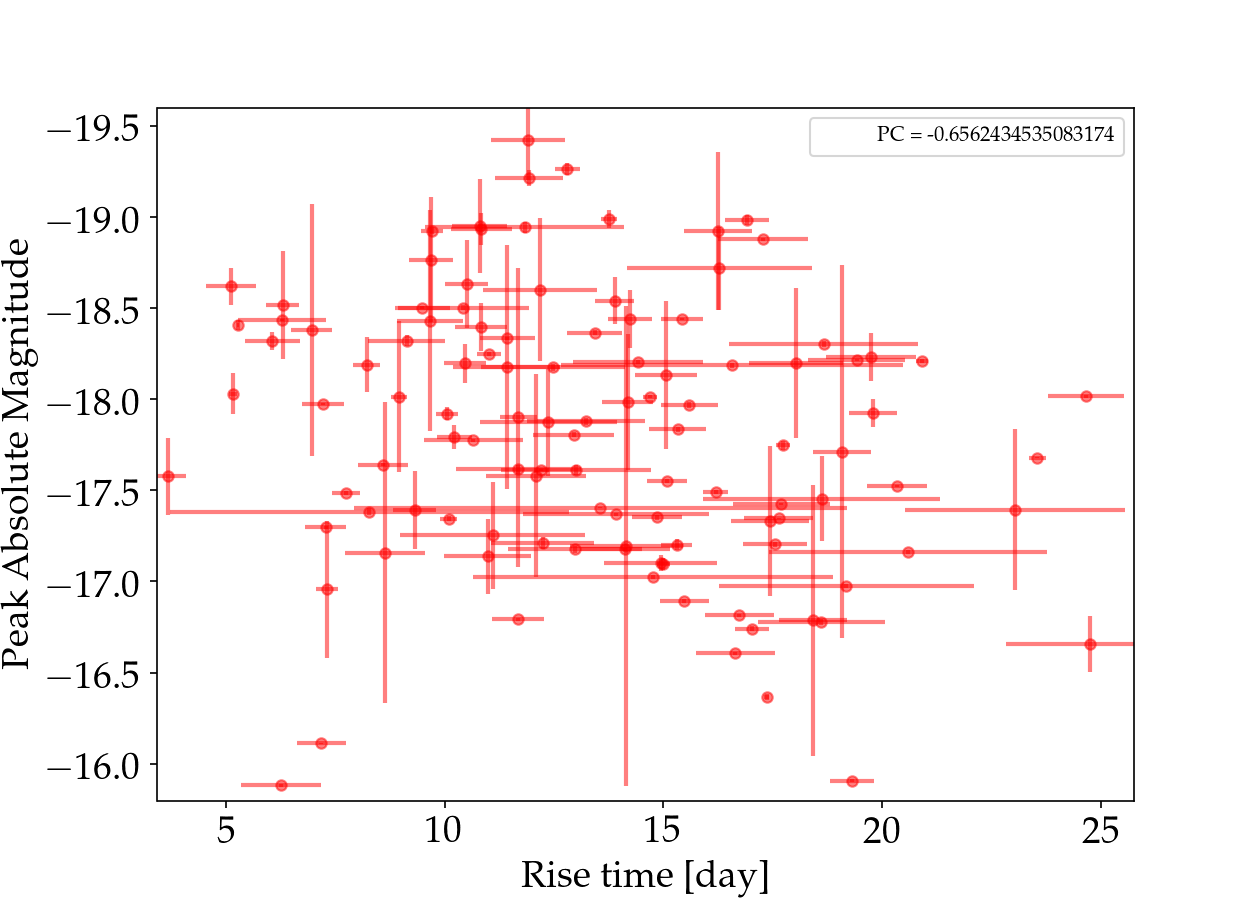

In [45]:
plt.figure(figsize = (1.4*6,6))
plt.errorbar(r_dec['peakday_r'], r_dec['peakabsmag_r'] ,r_dec['e_peakabsmag_r'], r_dec['e_peakday_r'], 
            fmt= 'o', alpha = 0.5,ms = 5 ,elinewidth=2,color = 'red')


corr_a,_ = pearsonr(r_dec['decline_r'],r_dec['peakabsmag_r']) 
plt.plot(0, -17, label = f'PC = {corr_a}', color='white' )

plt.legend()
plt.xlabel('Rise time [day]', size = 18)
plt.ylabel('Peak Absolute Magnitude',size = 18)
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


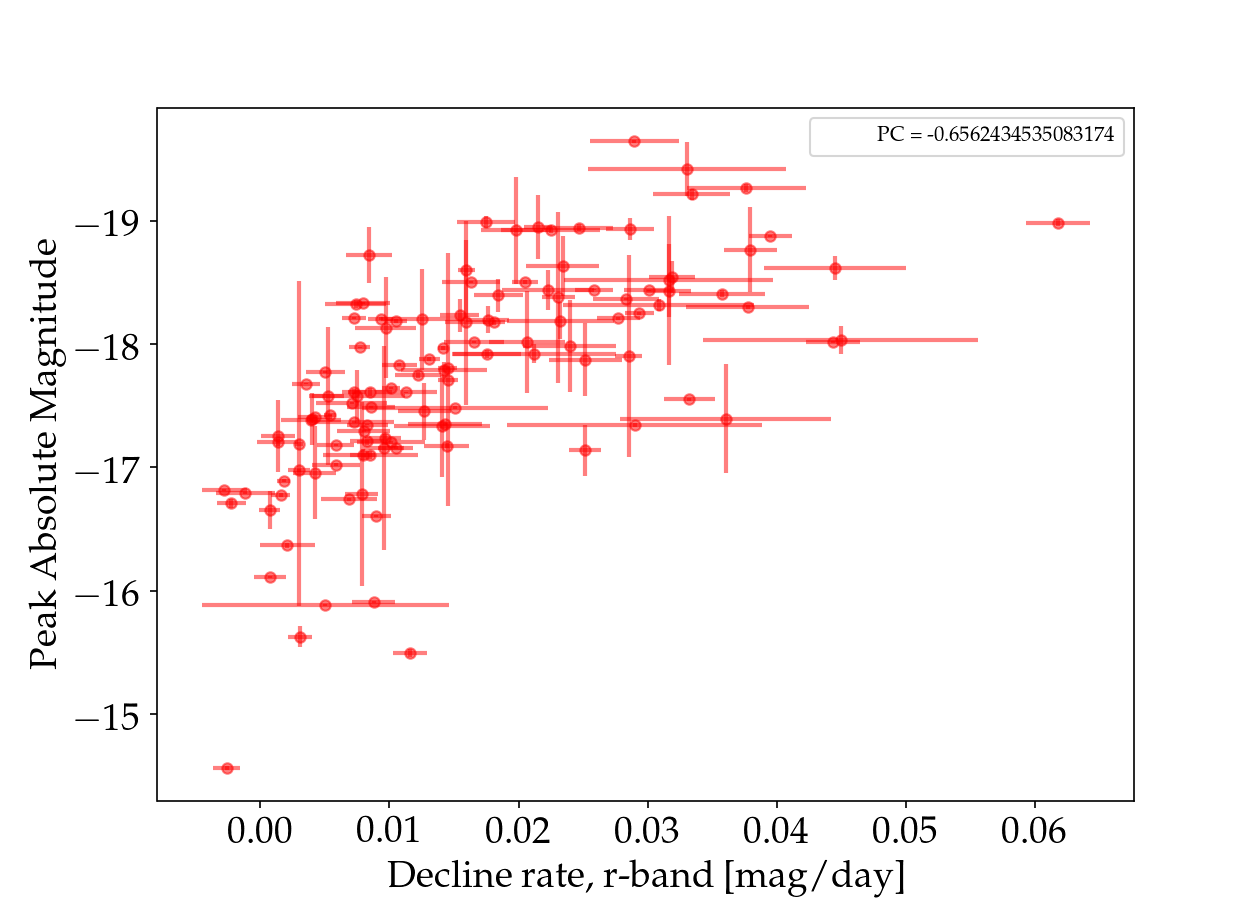

In [41]:
plt.figure(figsize = (1.4*6,6))
plt.errorbar(r_dec['decline_r'], r_dec['peakabsmag_r'], r_dec['e_peakabsmag_r'], r_dec['e_decline_r'], 
            fmt= 'o', alpha = 0.5,ms = 5 ,elinewidth=2,color = 'red')


corr_a,_ = pearsonr(r_dec['decline_r'],r_dec['peakabsmag_r']) 
plt.plot(0, -17, label = f'PC = {corr_a}', color='white' )

plt.legend()
plt.xlabel('Decline rate, r-band [mag/day]', size = 18)
plt.ylabel('Peak Absolute Magnitude',size = 18)
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


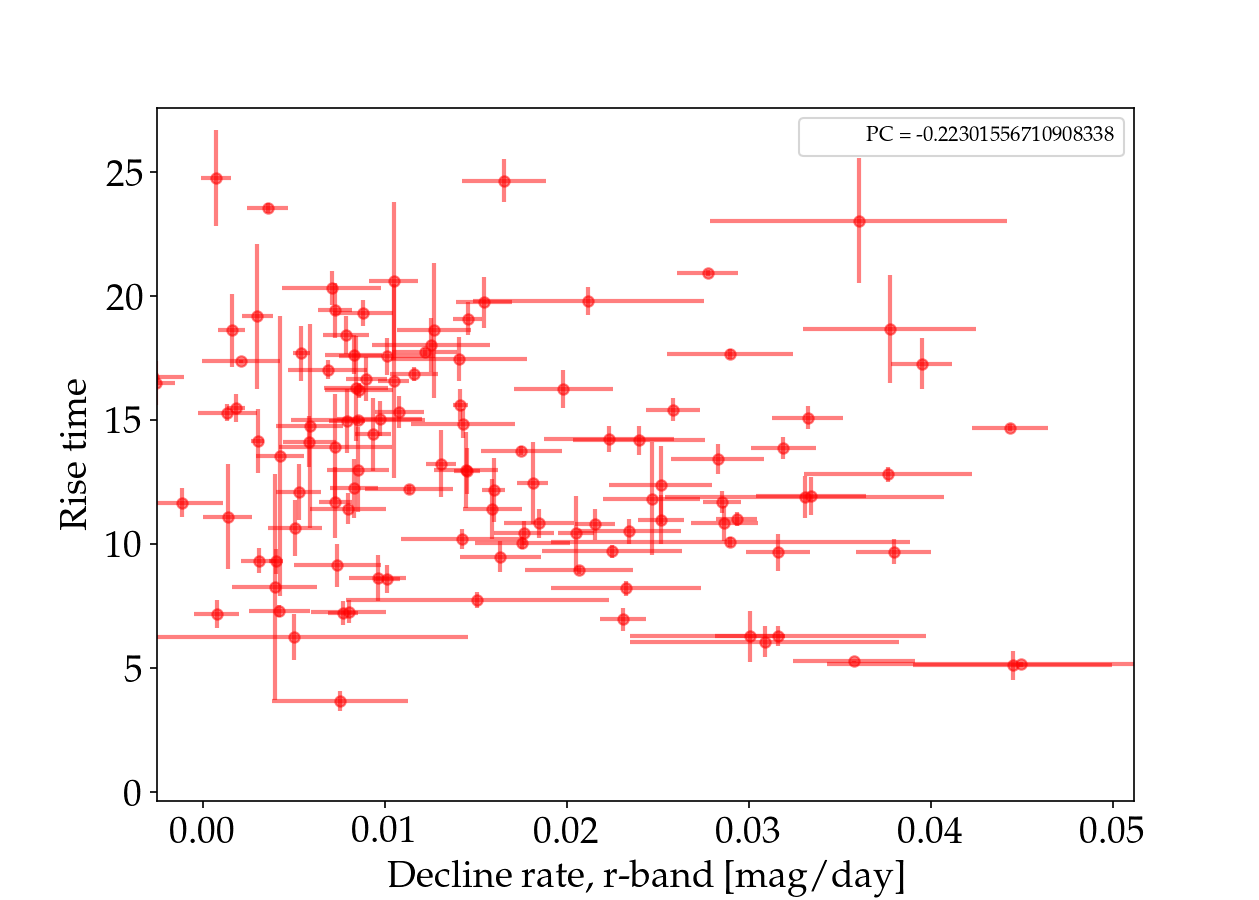

Text(0, 0.5, 'Rise time')

In [42]:
plt.figure(figsize = (1.4*6,6))
plt.errorbar(r_dec['decline_r'], r_dec['peakday_r'], r_dec['e_peakday_r'], r_dec['e_decline_r'], 
            fmt= 'o', alpha = 0.5,ms = 5 ,elinewidth=2,color = 'red')


corr_a,_ = pearsonr(r_dec['decline_r'],r_dec['peakday_r'])  
plt.plot(0, 0, label = f'PC = {corr_a}', color='white' )

plt.legend()
plt.xlabel('Decline rate, r-band [mag/day]', size = 18)
plt.ylabel('Rise time',size = 18)
# plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


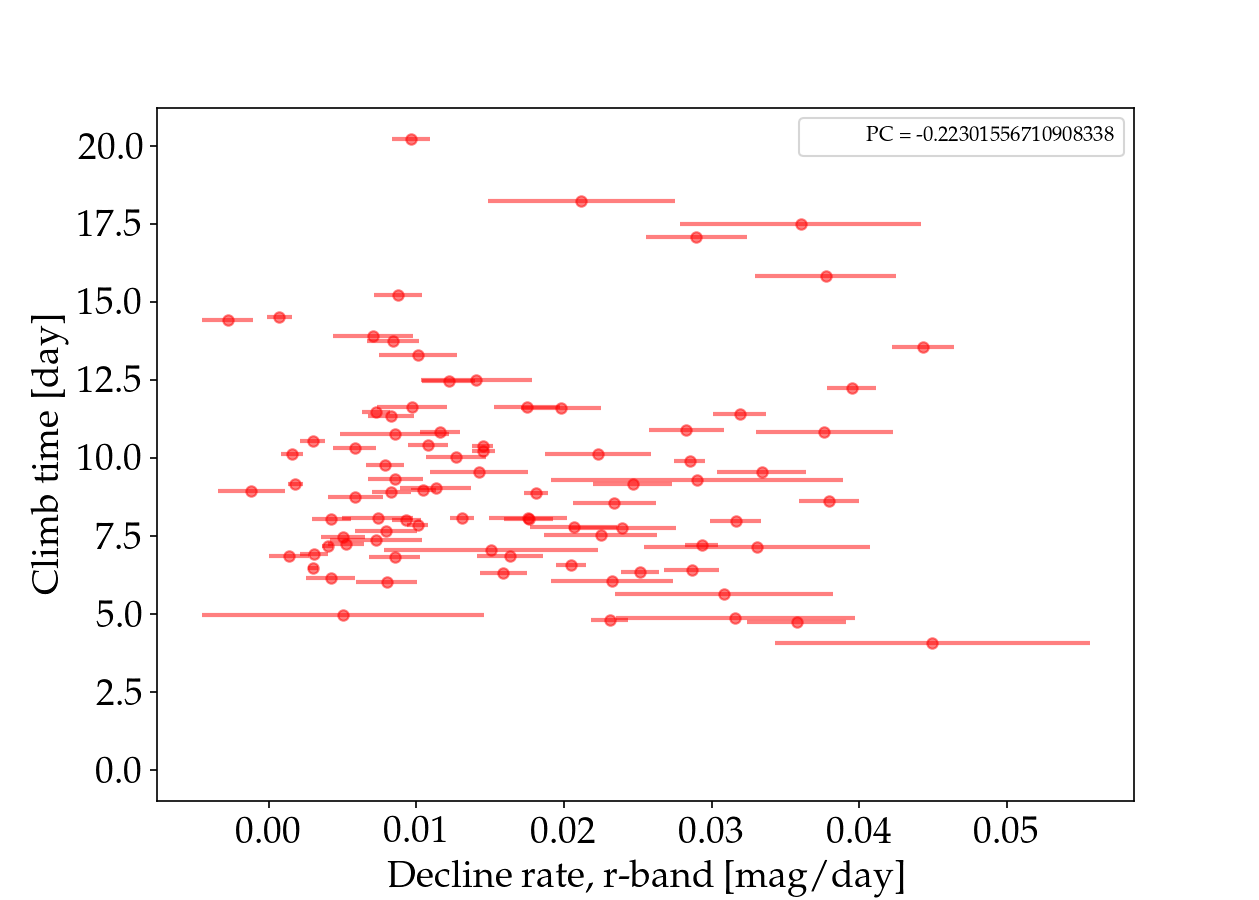

Text(0, 0.5, 'Climb time [day]')

In [9]:
plt.figure(figsize = (1.4*6,6))
plt.errorbar(r_dec[r_dec['climb_time_r']!=99.]['decline_r'], r_dec[r_dec['climb_time_r']!=99.]['climb_time_r'],
             xerr= r_dec[r_dec['climb_time_r']!=99.]['e_decline_r'], 
            fmt= 'o', alpha = 0.5,ms = 5 ,elinewidth=2,color = 'red')


corr_a,_ = pearsonr(r_dec['decline_r'],r_dec['peakday_r']) 
plt.plot(0, 0, label = f'PC = {corr_a}', color='white' )

plt.legend()
plt.xlabel('Decline rate, r-band [mag/day]', size = 18)
plt.ylabel('Climb time [day]',size = 18)
# plt.gca().invert_yaxis()

assuming errors are gaussian, we want to transform all these data points into 2d gaussians. 

In [9]:
# # r_dec['decline_r'], r_dec['peakday_r'], r_dec['e_peakday_r'], r_dec['e_decline_r']

# # Assuming that the covariance matrix is diagonal? 

# test1 = multivariate_normal([r_dec['decline_r'][2], r_dec['peakday_r'][2]],
#                             [[ r_dec['e_decline_r'][2], 0], [0, r_dec['e_peakday_r'][2]]])

# test2 = multivariate_normal([r_dec['decline_r'][15], r_dec['peakday_r'][15]],
#                             [[ r_dec['e_decline_r'][15], 0], [0, r_dec['e_peakday_r'][15]]])

## The full phase space

In [9]:
from scipy.signal import convolve2d

<IPython.core.display.Javascript object>


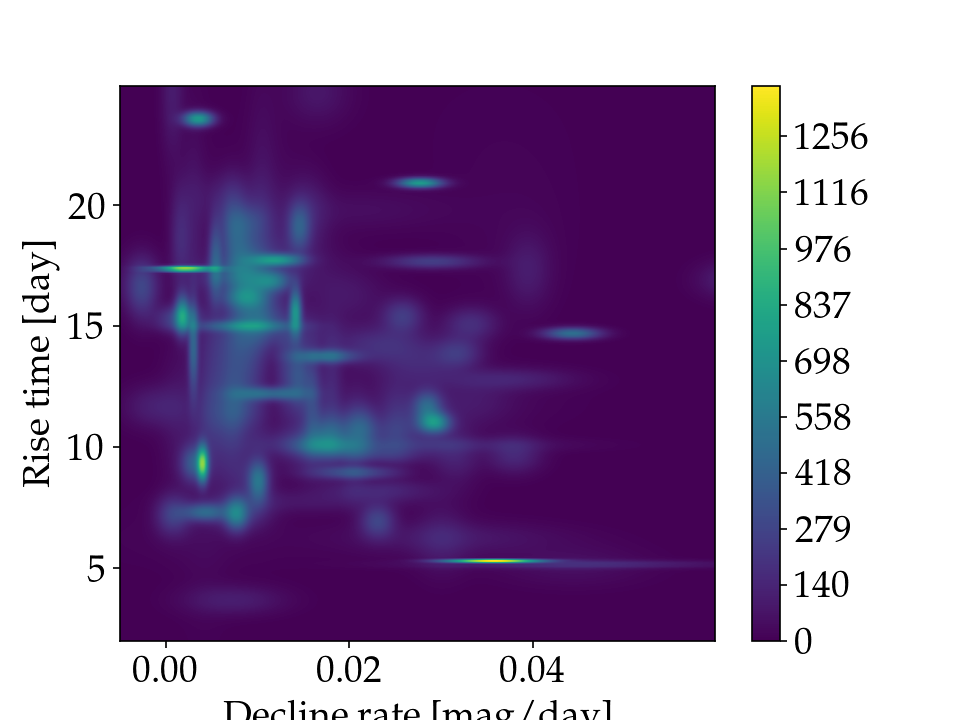

In [33]:
x, y = np.mgrid[-0.005:0.06:.0001, 2:25:0.1]
pos  = np.dstack((x, y))


plt.figure()
# ax32 = fig2.add_subplot(111)


pdf = np.zeros((650,230))
# pdf = np.where(pdf==0, 1, 1)

for _ in range(len(r_dec['name'])):
    _temp = multivariate_normal(mean = [r_dec['decline_r'][_], r_dec['peakday_r'][_]],
                            cov = [[ r_dec['e_decline_r'][_]**2, 0], [0, r_dec['e_peakday_r'][_]**2]])
    pdf = pdf + _temp.pdf(pos)
#     pdf = convolve2d(pdf,_temp.pdf(pos),mode='valid')
    
    
# _temp1 = multivariate_normal([r_dec['decline_r'][2], r_dec['peakday_r'][2]],
#                             [[ r_dec['e_decline_r'][2], 0], [0, r_dec['e_peakday_r'][2]]])
    

# _temp2 = multivariate_normal([r_dec['decline_r'][5], r_dec['peakday_r'][5]],
#                             [[ r_dec['e_decline_r'][5], 0], [0, r_dec['e_peakday_r'][5]]])
    
# _temp = _temp1.pdf(pos)+_temp2.pdf(pos)+0



plt.contourf(x, y, pdf, levels = 1000)
# plt.imshow(pdf)
# plt.zscale = 'log'
plt.xlabel('Decline rate [mag/day]', size = 18)
plt.ylabel('Rise time [day]', size = 18)
plt.colorbar()

In [19]:
len(pdf[:,0])

321

In [14]:
norma = np.zeros((65,230))

for i in range(65): #650,230          # 649 rows -> amount of decline dp
    for j in range(230): #650,230       #230 column -> amount of rise time dp
        norma[i,j] = pdf[i,j]*0.001*0.01
    
# norma = np.where(norma > 0 , norma , 1) 

In [20]:
np.sum(pdf)/np.sum(norma)

99999.99999999999

<IPython.core.display.Javascript object>


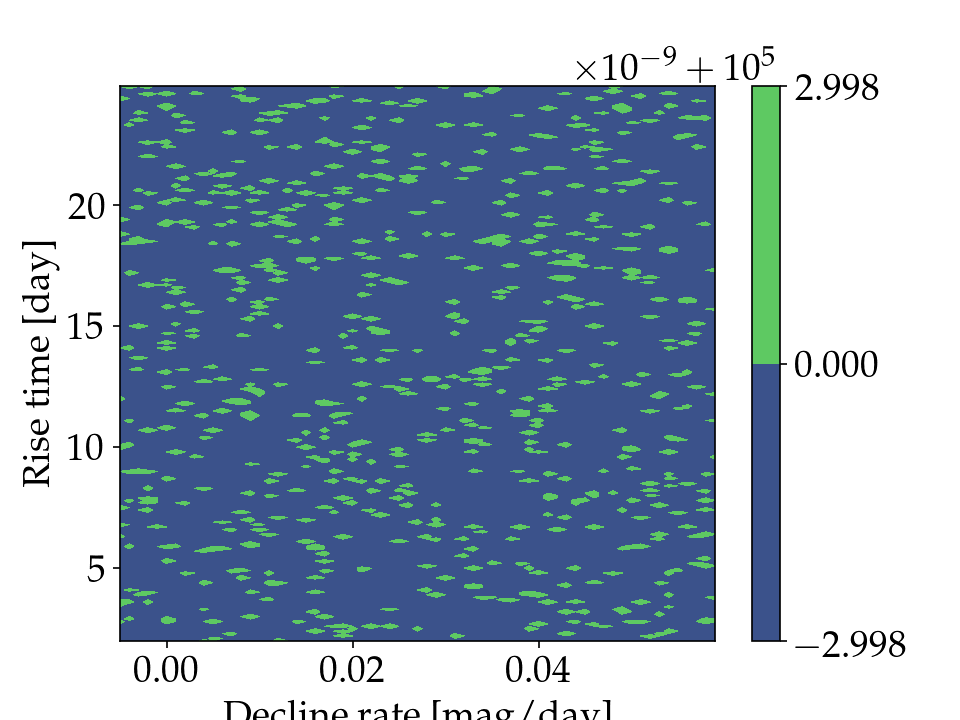

In [19]:
plt.figure()

plt.contourf(x, y, pdf/norma)
plt.xlabel('Decline rate [mag/day]', size = 18)
plt.ylabel('Rise time [day]', size = 18)
plt.colorbar()

In [71]:
norma

array([[3.89388388e-08, 4.25576993e-08, 4.86917149e-08, ...,
        8.84966529e-08, 9.62533436e-08, 1.00000000e+00],
       [1.75556675e-07, 1.85032398e-07, 1.99469688e-07, ...,
        5.26690103e-07, 5.72974789e-07, 1.00000000e+00],
       [6.83602451e-07, 7.11969180e-07, 7.50404783e-07, ...,
        1.46001742e-06, 1.58488152e-06, 1.00000000e+00],
       ...,
       [1.66680836e-11, 4.20160678e-11, 1.02761420e-10, ...,
        2.32536991e-06, 2.26293702e-06, 1.00000000e+00],
       [1.07922171e-11, 2.72045739e-11, 6.65361309e-11, ...,
        1.68624822e-06, 1.64100034e-06, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [72]:
pdf

array([[3.89388388e-03, 4.25576993e-03, 4.86917149e-03, ...,
        8.84966529e-03, 9.62533436e-03, 1.04625724e-02],
       [1.75556675e-02, 1.85032398e-02, 1.99469688e-02, ...,
        5.26690103e-02, 5.72974789e-02, 6.22929976e-02],
       [6.83602451e-02, 7.11969180e-02, 7.50404783e-02, ...,
        1.46001742e-01, 1.58488152e-01, 1.71955490e-01],
       ...,
       [1.66680836e-06, 4.20160678e-06, 1.02761420e-05, ...,
        2.32536991e-01, 2.26293702e-01, 2.19869134e-01],
       [1.07922171e-06, 2.72045739e-06, 6.65361309e-06, ...,
        1.68624822e-01, 1.64100034e-01, 1.59443418e-01],
       [6.75805668e-07, 1.70354734e-06, 4.16649158e-06, ...,
        1.20470449e-01, 1.17238900e-01, 1.13913009e-01]])

In [41]:
# range(629)

In [16]:
# xc, yc = np.mgrid[-0.005:0.05:.0001, 0:23:0.1]
# posc  = np.dstack((xc, yc))


# plt.figure()
# # ax32 = fig2.add_subplot(111)


# pdfc = 0

# for _ in range(len(r_dec[r_dec['climb_time_r']!=99.]['name'])):
#     _temp = multivariate_normal([r_dec[r_dec['climb_time_r']!=99.]['decline_r'][_], r_dec[r_dec['climb_time_r']!=99.]['climb_time_r'][_]],
#                             [[ r_dec['e_decline_r'][_]**2, 0], [0, 0.5**2]])
#     ## Par default pour le climb time, je mets half a day
    
#     pdfc = pdfc + _temp.pdf(posc)
    
# plt.contourf(xc, yc, pdfc)
# plt.xlabel('Decline rate [mag/day]', size = 18)
# plt.ylabel('Climb time [day]', size = 18)
# # plt.colorbar()

<IPython.core.display.Javascript object>


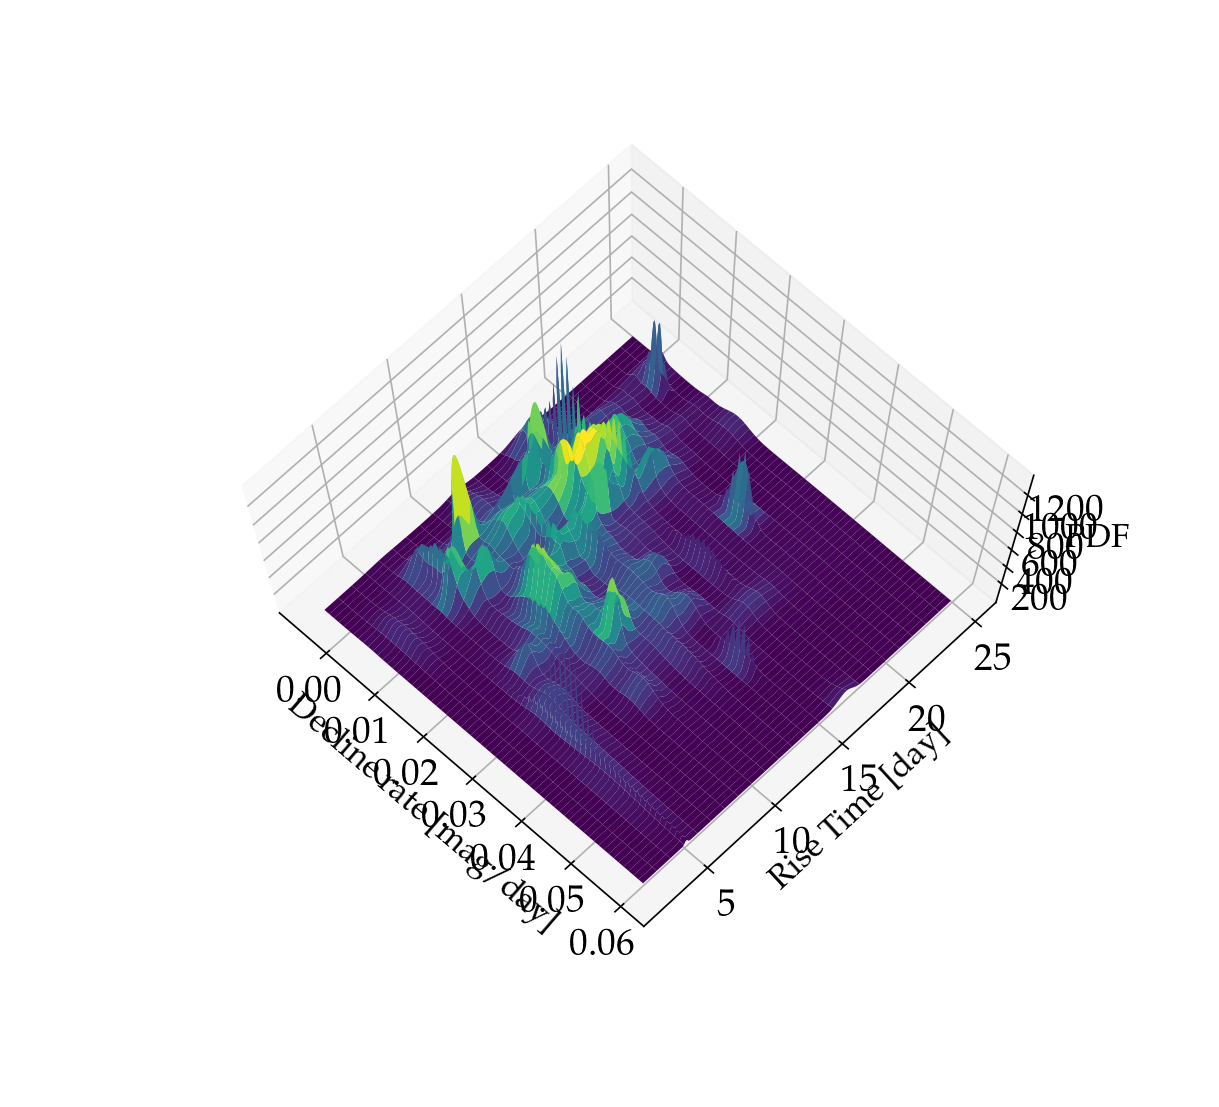

Text(0.5, 0, 'PDF')

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, pdf, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
# ax.contour3D(x, y, pdf)
ax.set_xlabel('Decline rate [mag/day]', size = 16)
ax.set_ylabel('Rise Time [day]', size = 16)
ax.set_zlabel('PDF', size = 16)

In [29]:
len(pdf[:,0])

650

<IPython.core.display.Javascript object>


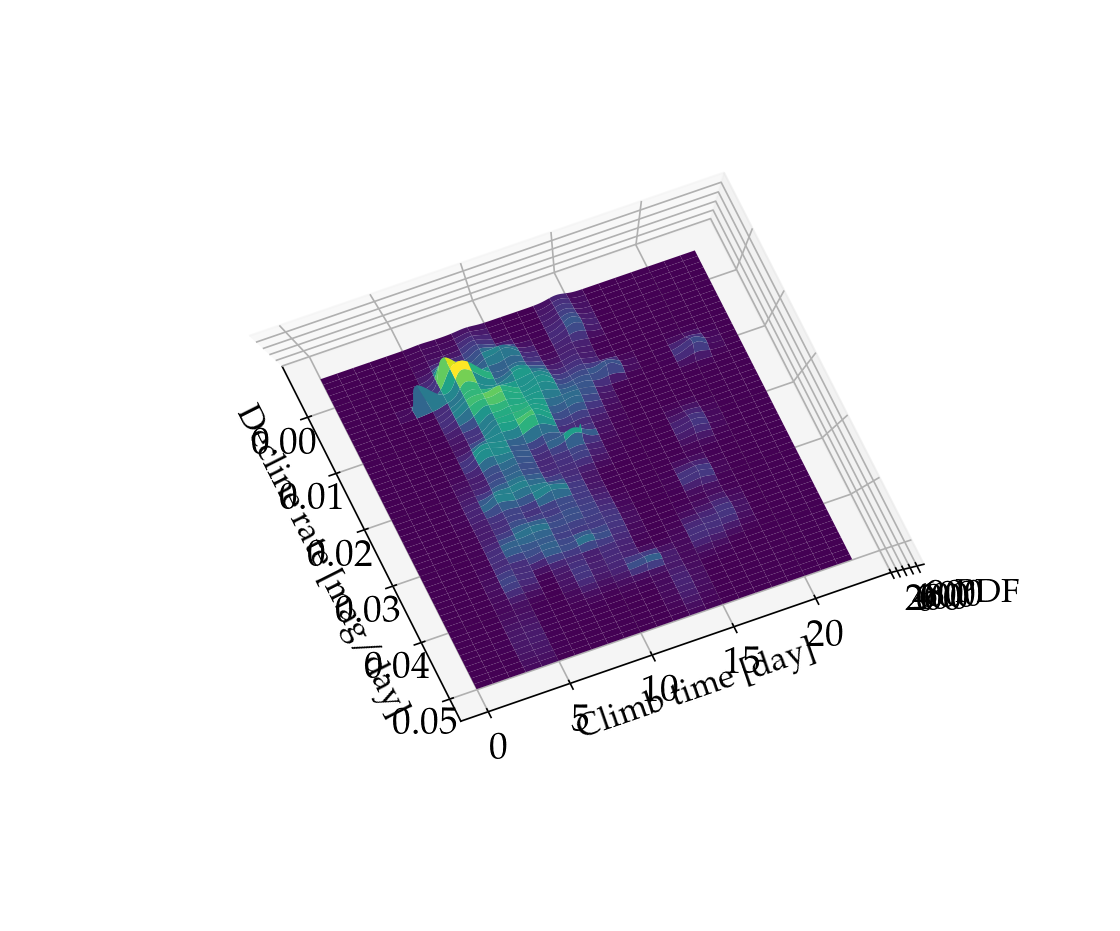

Text(0.5, 0, 'PDF')

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xc, yc, pdfc, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
# ax.contour3D(x, y, pdf)
ax.set_xlabel('Decline rate [mag/day]', size = 16)
ax.set_ylabel('Climb time [day]', size = 16)
ax.set_zlabel('PDF', size = 16)

##  "Shorter" Rise times (less than 10 days)

In [28]:
short_rise = r_dec[r_dec['peakday_r']<12]

<IPython.core.display.Javascript object>


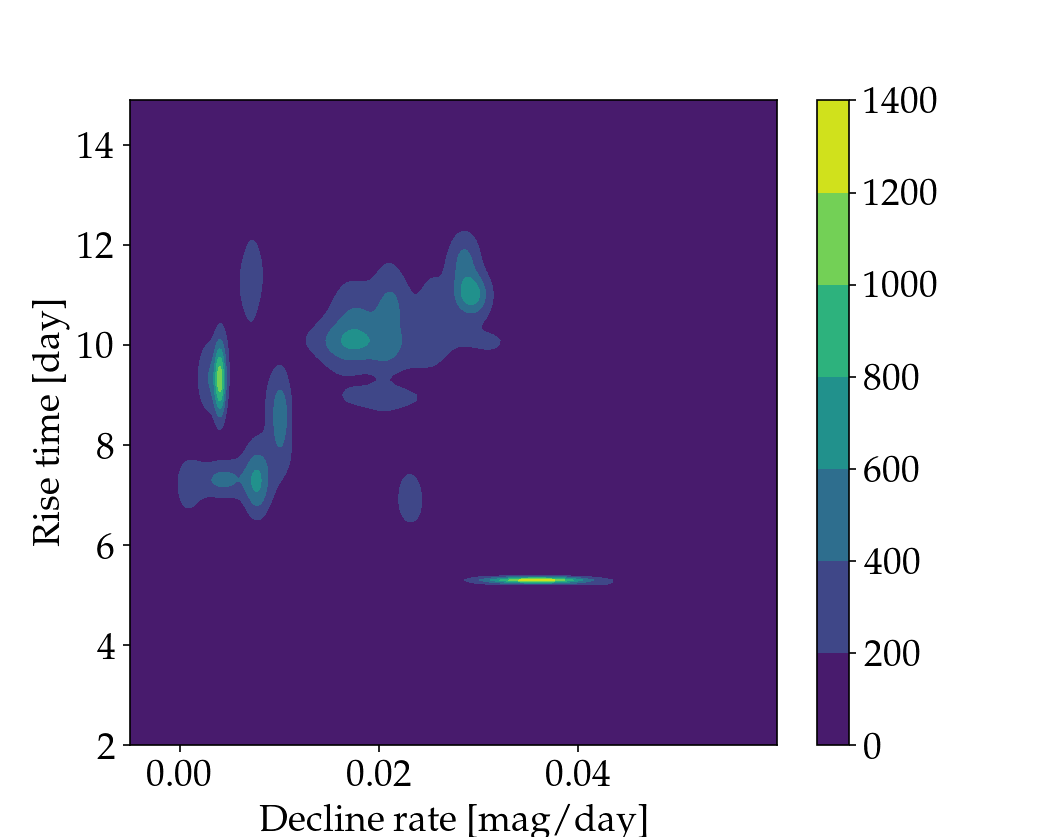

In [30]:


xs, ys = np.mgrid[-0.005:0.06:.0001, 2:15:0.1]
poss  = np.dstack((xs, ys))


plt.figure()
# ax32 = fig2.add_subplot(111)


pdf_short = 0

for _ in range(len(short_rise['name'])):
    _temp = multivariate_normal([short_rise['decline_r'][_], short_rise['peakday_r'][_]],
                            [[ short_rise['e_decline_r'][_]**2, 0], [0, short_rise['e_peakday_r'][_]**2]])
    pdf_short = pdf_short + _temp.pdf(poss)
    

plt.contourf(xs, ys, pdf_short)
plt.xlabel('Decline rate [mag/day]', size = 18)
plt.ylabel('Rise time [day]', size = 18)
plt.colorbar()




<IPython.core.display.Javascript object>


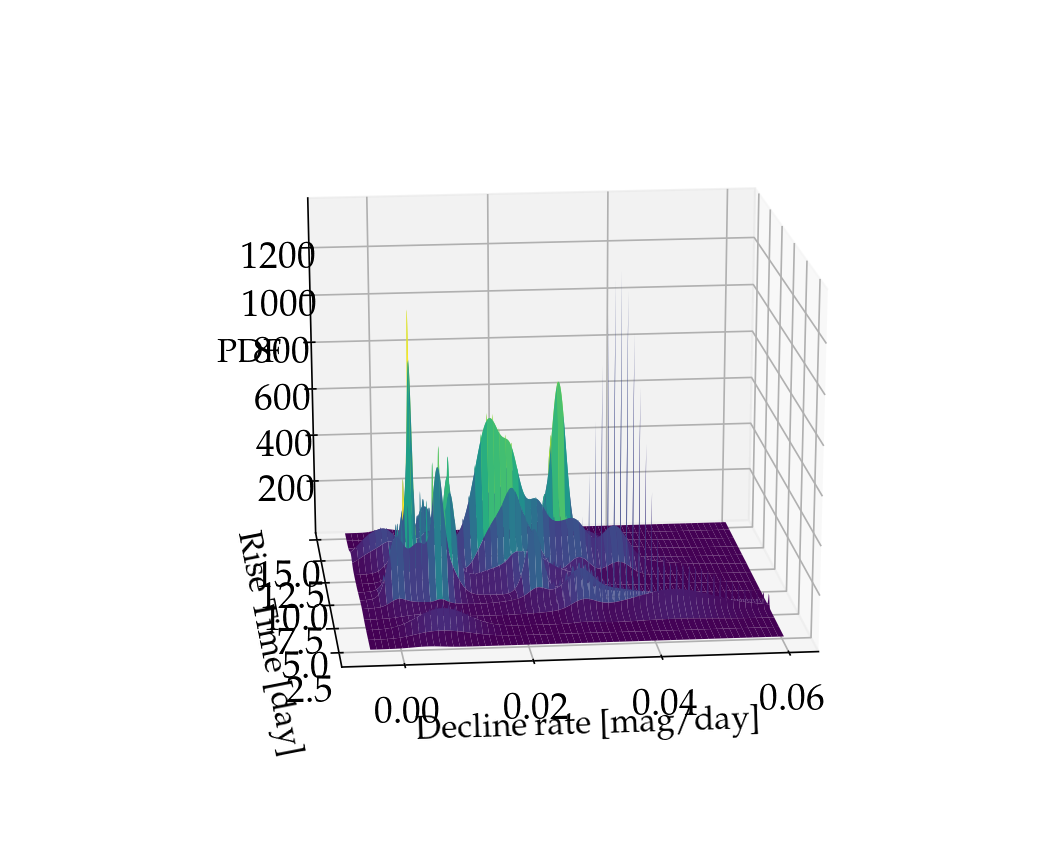

Text(0.5, 0, 'PDF')

In [31]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xs, ys, pdf_short, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
# ax.contour3D(x, y, pdf)
ax.set_xlabel('Decline rate [mag/day]', size = 16)
ax.set_ylabel('Rise Time [day]', size = 16)
ax.set_zlabel('PDF', size = 16)

<IPython.core.display.Javascript object>


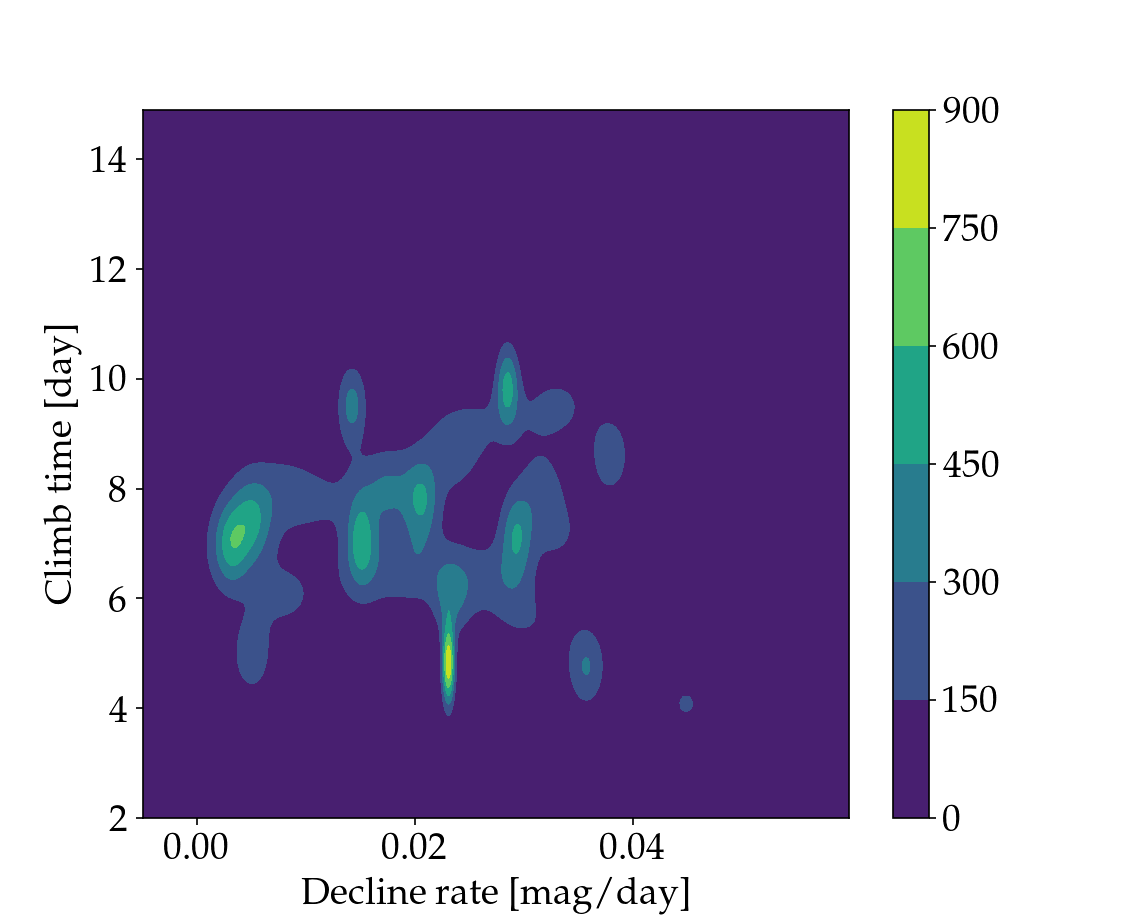

In [38]:


xsc, ysc = np.mgrid[-0.005:0.06:.0001, 2:15:0.1]
possc  = np.dstack((xsc, ysc))


plt.figure()
# ax32 = fig2.add_subplot(111)


pdf_shortc = 0

for _ in range(len(short_rise[short_rise['climb_time_r']!=99.]['name'])):
    _temp = multivariate_normal([short_rise[short_rise['climb_time_r']!=99.]['decline_r'][_], 
                                 short_rise[short_rise['climb_time_r']!=99.]['climb_time_r'][_]],
                            [[ short_rise['e_decline_r'][_]**2, 0], [0, 0.5**2]])
    pdf_shortc = pdf_shortc + _temp.pdf(possc)
    

plt.contourf(xsc, ysc, pdf_shortc)
plt.xlabel('Decline rate [mag/day]', size = 18)
plt.ylabel('Climb time [day]', size = 18)
plt.colorbar()




<IPython.core.display.Javascript object>


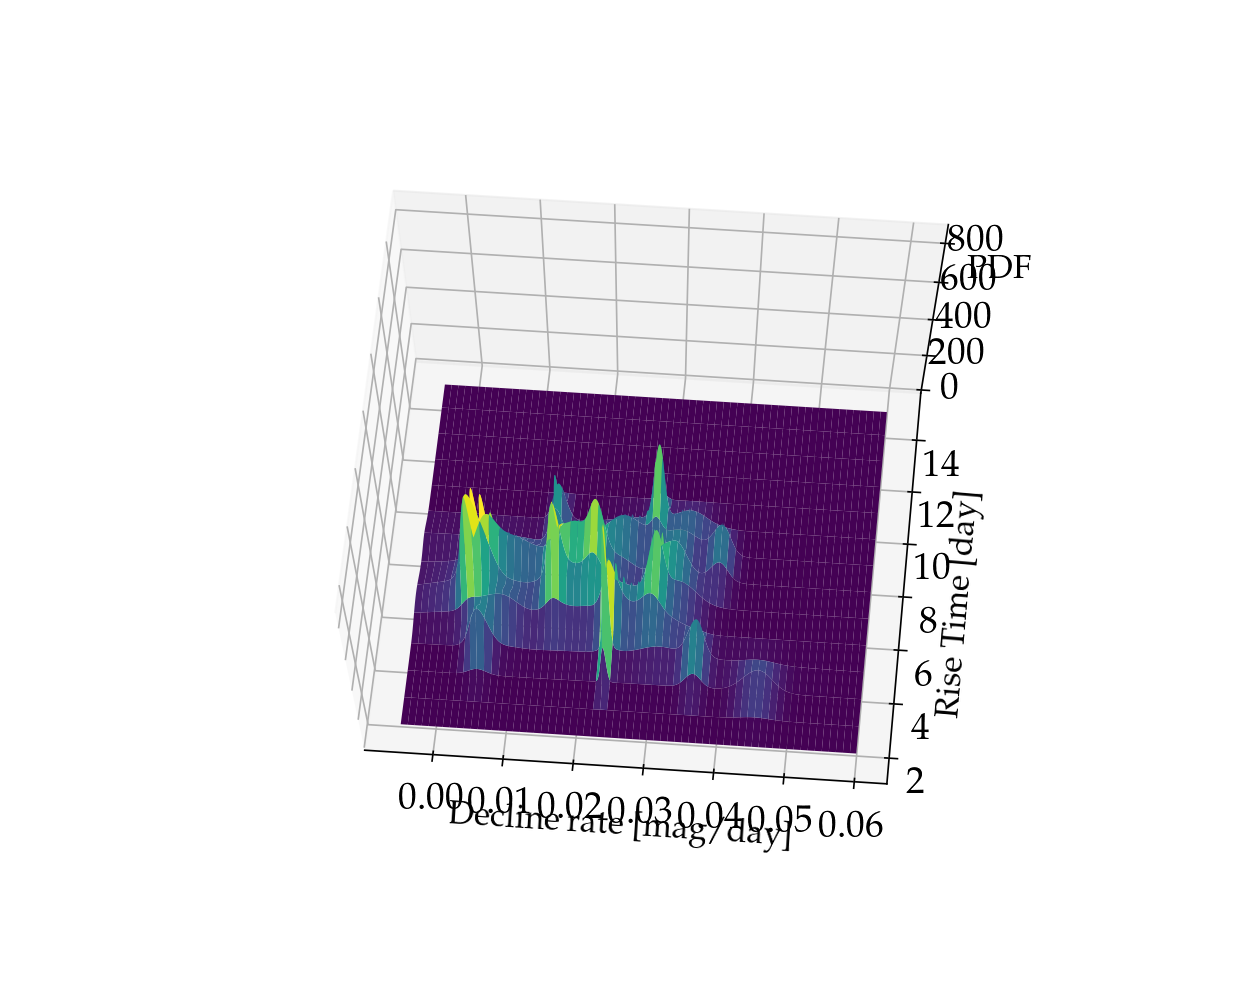

Text(0.5, 0, 'PDF')

In [39]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xsc, ysc, pdf_shortc, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
# ax.contour3D(x, y, pdf)
ax.set_xlabel('Decline rate [mag/day]', size = 16)
ax.set_ylabel('Climb Time [day]', size = 16)
ax.set_zlabel('PDF', size = 16)

##  "Longer" Rise times (more than 12days)

In [33]:
long_rise = r_dec[r_dec['peakday_r']>=12]

<IPython.core.display.Javascript object>


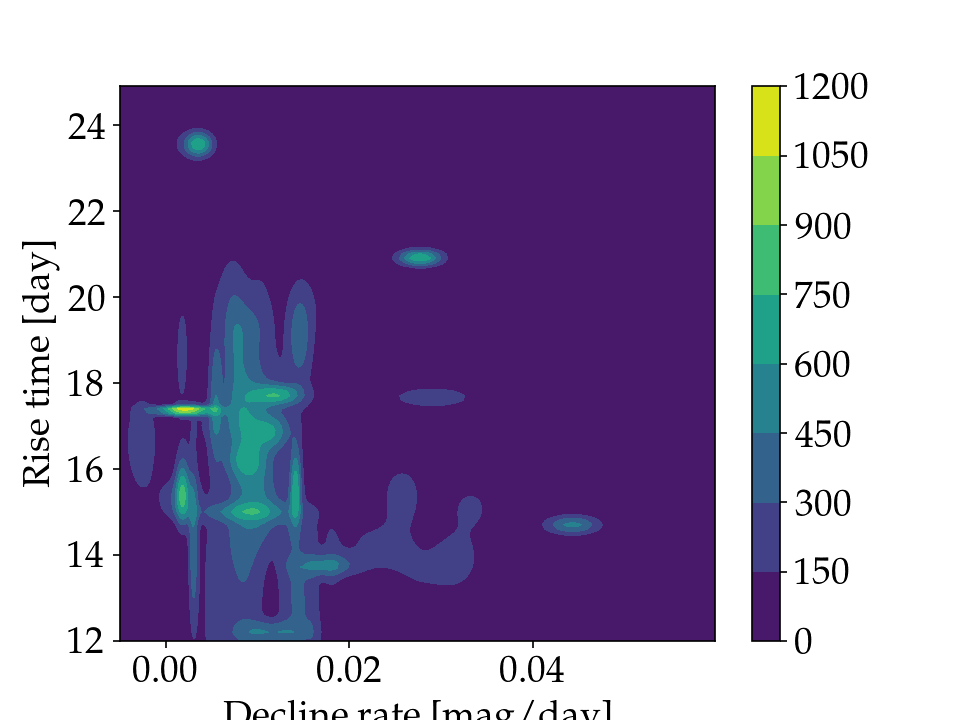

In [35]:

xl, yl = np.mgrid[-0.005:0.06:.0001, 12:25:0.1]
posl  = np.dstack((xl, yl))


plt.figure()
# ax32 = fig2.add_subplot(111)


pdf_long = 0

for _ in range(len(long_rise['name'])):
    _temp = multivariate_normal([long_rise['decline_r'][_], long_rise['peakday_r'][_]],
                            [[ long_rise['e_decline_r'][_]**2, 0], [0, long_rise['e_peakday_r'][_]**2]])
    pdf_long = pdf_long + _temp.pdf(posl)
    

plt.contourf(xl, yl, pdf_long)
plt.xlabel('Decline rate [mag/day]', size = 18)
plt.ylabel('Rise time [day]', size = 18)
plt.colorbar()




<IPython.core.display.Javascript object>


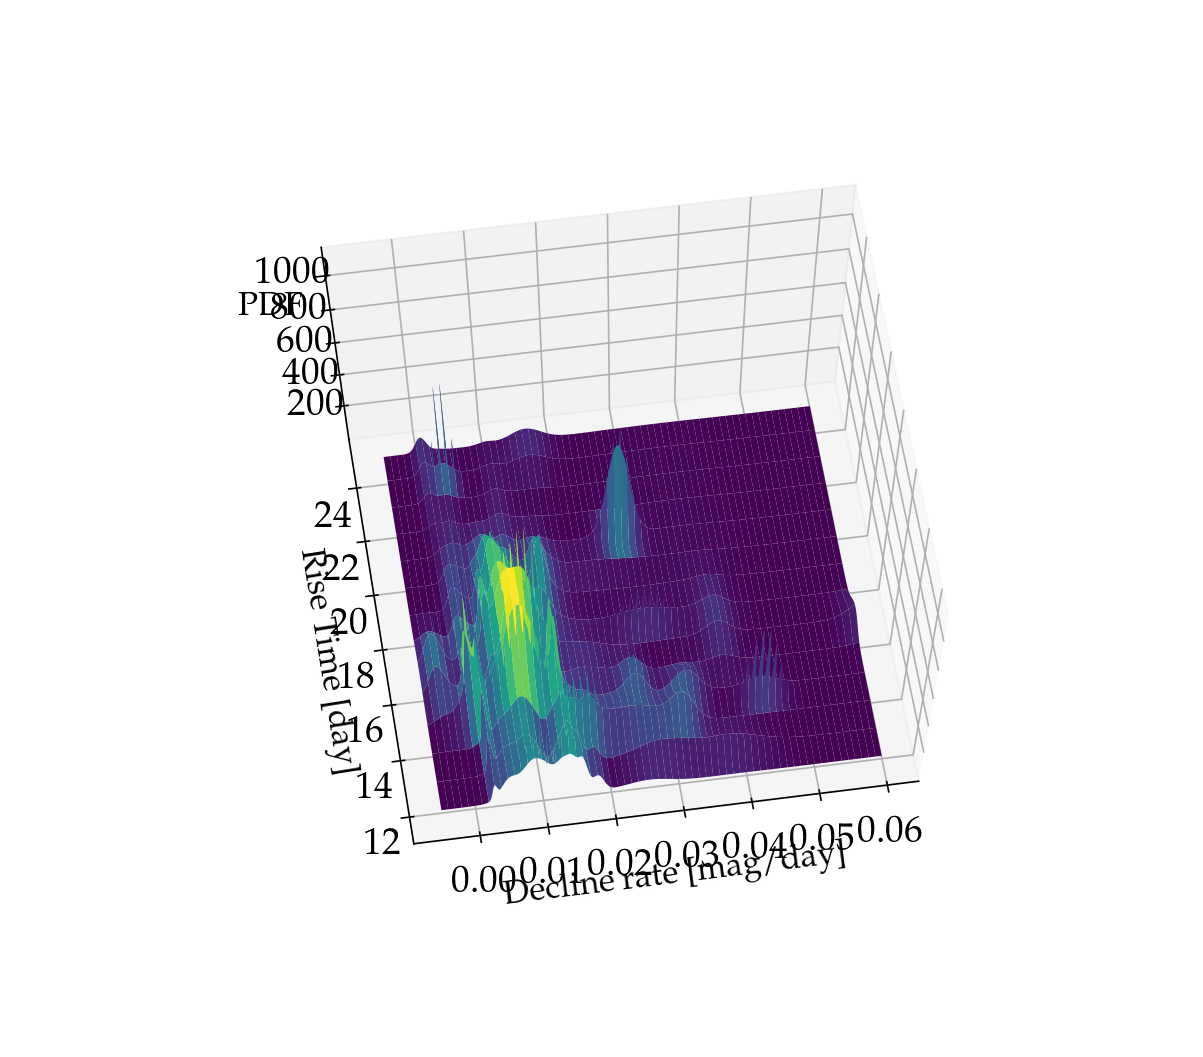

Text(0.5, 0, 'PDF')

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xl, yl, pdf_long, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
# ax.contour3D(x, y, pdf)
ax.set_xlabel('Decline rate [mag/day]', size = 16)
ax.set_ylabel('Rise Time [day]', size = 16)
ax.set_zlabel('PDF', size = 16)

<IPython.core.display.Javascript object>


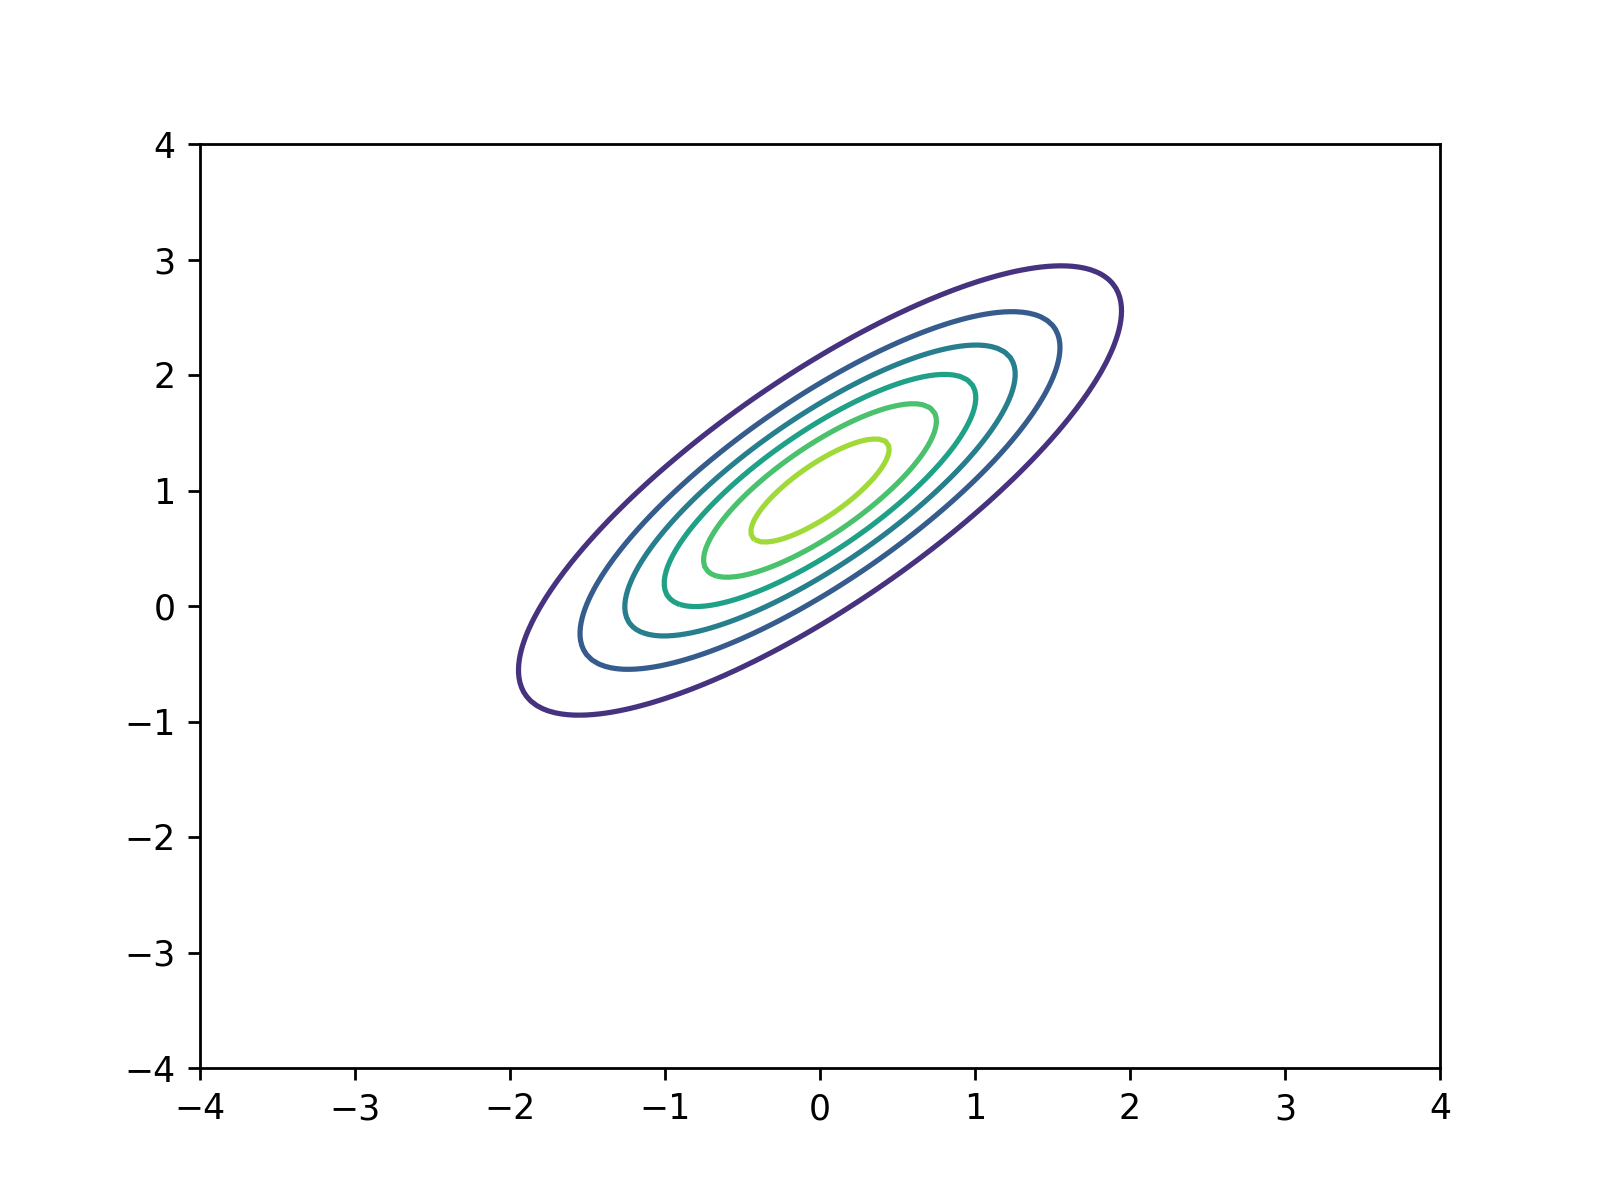

In [13]:
N    = 200
X    = np.linspace(-4, 4, N)
Y    = np.linspace(-4, 4, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
rv   = multivariate_normal([0, 1], [[1, 0.8], [0.8, 1]])
Z    = rv.pdf(pos)
plt.figure()
plt.contour(X, Y, Z)


## Kernel Density Estimation for the Rise/Decline distributions


WARNING: The estimation works best for a unimodal distribution; bimodal or multi-modal distributions tend to be oversmoothed. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html